In [ ]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('/content/lab2 data.csv')

In [ ]:
df.isna().sum()

,0
Reg No,0
Job role that you are interested in,2
Min salary,2
Max salary,6
Median salary,7
highest paying company,2
Contribution in Ex-curricular,2
Tech competence,1
Package exp,2
CIA of last sem,12


In [ ]:

df['Intern Interest'] = df['Intern Interest'].fillna('None')
intern_interest_counts = df['Intern Interest'].value_counts(dropna=False)
print(intern_interest_counts)

# shows that none is also counted as a missing value

Intern Interest
Industry    99
Research    39
None        26
Name: count, dtype: int64


In [ ]:
df.isna().sum()

,0
Reg No,0
Job role that you are interested in,2
Min salary,2
Max salary,6
Median salary,7
highest paying company,2
Contribution in Ex-curricular,2
Tech competence,1
Package exp,2
CIA of last sem,12


In [ ]:
def normalize_salary(val):
    if pd.isna(val):
        return np.nan
    val = str(val).lower().replace(",", "").strip()

    match = re.findall(r"[\d.]+", val)
    if not match:
        return np.nan
    num = float(match[0])

    if 'cr' in val or 'crore' in val:
        return num * 1e7
    elif 'lpa' in val or 'lac' in val or 'lakh' in val or 'l' in val:
        return num * 1e5
    elif num > 1e5:
        return num
    else:
        return num * 1e5

salary_cols = ['Min salary', 'Max salary', 'Median salary', 'Package exp']

for col in salary_cols:
    df[col + ' (Normalized)'] = df[col].apply(normalize_salary)


In [ ]:
df.head(10)

,Reg No,Job role that you are interested in,Min salary,Max salary,Median salary,highest paying company,Contribution in Ex-curricular,Tech competence,Package exp,CIA of last sem,GPA of last sem,max attendance till last sem,Intern Interest,Min salary (Normalized),Max salary (Normalized),Median salary (Normalized),Package exp (Normalized)
0,1,Business Analyst,5,20,10,Capgemini,4.0,4.0,12,85,8.5,93,Industry,500000.0,2000000.0,1000000.0,1200000.0
1,2,Data Scientist,3,8,5,Capgemini,3.0,4.0,10,90,8,100,Research,300000.0,800000.0,500000.0,1000000.0
2,3,Data Scientist,5L,24L,10L,DE Shaw,3.0,3.0,8L,50%,8.6,95%,Research,500000.0,2400000.0,1000000.0,800000.0
3,4,Data Scientist,6 lac,13 lac,7 lac,Deolite,3.0,2.0,10 lac,57,60,92,Industry,600000.0,1300000.0,700000.0,1000000.0
4,5,Data Engineer,8 lac,18 lac,10 lac,DE Shaw,4.0,2.0,13 lac,60,71,93,Industry,800000.0,1800000.0,1000000.0,1300000.0
5,6,Data Engineer,20,10,15,Deolite,5.0,4.0,20,93,8,93,Industry,2000000.0,1000000.0,1500000.0,2000000.0
6,7,Business Analyst,700000,3300000,1500000,Deolite,3.0,3.0,1500000,NaN,9.8,95.76%,Industry,700000.0,3300000.0,1500000.0,1500000.0
7,8,Software Engineer,NaN,NaN,NaN,EY,1.0,1.0,1 Morbillion,35%,2.5,85%,None,NaN,NaN,NaN,100000.0
8,9,Data Scientist,8,20,14,DE Shaw,3.0,4.0,10,80,3.5,90,Research,800000.0,2000000.0,1400000.0,1000000.0
9,10,Business Analyst,4,24,9,Deolite,2.0,3.0,15,80,3.41,90,Industry,400000.0,2400000.0,900000.0,1500000.0


In [ ]:
df.drop(['Min salary','Max salary','Median salary','Package exp'], axis=1, inplace=True)

In [ ]:
df.rename(columns={'CIA of last sem':'CIA% of last sem','Min salary (Normalized)':'Min salary','Max salary (Normalized)':'Max salary','Median salary (Normalized)':'Median salary','Package exp (Normalized)':'Package exp'}, inplace=True)

In [ ]:
def fix_grade(val):
    if pd.isna(val):
        return np.nan

    val = str(val).strip().replace('%', '')

    try:
        val = float(val)
    except:
        return np.nan


    if val <= 5:
        return val * 20
    elif val <= 10:
        return val * 10
    elif val <= 100:
        return val
    else:
        return np.nan



df['CIA_cleaned'] = df['CIA% of last sem'].apply(fix_grade)
df['GPA_cleaned'] = df['GPA of last sem'].apply(fix_grade)


for col in ['CIA_cleaned', 'GPA_cleaned']:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + '_normalized'] = (df[col] - min_val) / (max_val - min_val)


In [ ]:
df.drop(60, inplace=True)
df['Attendance_cleaned'] = df['max attendance till last sem'].astype(str).str.replace('%', '').astype(float)
min_val = df['Attendance_cleaned'].min()
max_val = df['Attendance_cleaned'].max()
df['Attendance_normalized'] = (df['Attendance_cleaned'] - min_val) / (max_val - min_val)

In [ ]:
df.drop(['CIA% of last sem','GPA of last sem','max attendance till last sem','Intern Interest','Contribution in Ex-curricular'], axis=1, inplace=True)

In [ ]:
df

,Reg No,Job role that you are interested in,highest paying company,Tech competence,Min salary,Max salary,Median salary,Package exp,CIA_cleaned,GPA_cleaned,CIA_cleaned_normalized,GPA_cleaned_normalized,Attendance_cleaned,Attendance_normalized
0,1,Business Analyst,Capgemini,4.0,500000.0,2000000.0,1000000.0,1200000.0,85.0,85.0,0.781250,0.714286,93.0,0.854167
1,2,Data Scientist,Capgemini,4.0,300000.0,800000.0,500000.0,1000000.0,90.0,80.0,0.859375,0.612245,100.0,1.000000
2,3,Data Scientist,DE Shaw,3.0,500000.0,2400000.0,1000000.0,800000.0,50.0,86.0,0.234375,0.734694,95.0,0.895833
3,4,Data Scientist,Deolite,2.0,600000.0,1300000.0,700000.0,1000000.0,57.0,60.0,0.343750,0.204082,92.0,0.833333
4,5,Data Engineer,DE Shaw,2.0,800000.0,1800000.0,1000000.0,1300000.0,60.0,71.0,0.390625,0.428571,93.0,0.854167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,160,Data Scientist,DE Shaw,3.0,3000000.0,8999000.0,500000.0,9000000.0,89.0,98.0,0.843750,0.979592,100.0,1.000000
160,161,Data Engineer,DE Shaw,1.0,300000.0,5600000.0,2000000.0,1900000.0,67.0,79.0,0.500000,0.591837,84.0,0.666667
161,162,Software Engineer,DE Shaw,2.0,500000.0,5000000.0,2300000.0,1200000.0,78.0,80.0,0.671875,0.612245,84.0,0.666667
162,163,Business Analyst,DE Shaw,4.0,700000.0,9800000.0,3000000.0,1700000.0,94.0,81.0,0.921875,0.632653,100.0,1.000000


In [ ]:
df.isna().sum()

,0
Reg No,0
Job role that you are interested in,2
highest paying company,2
Tech competence,1
Min salary,2
Max salary,6
Median salary,7
Package exp,4
CIA_cleaned,13
GPA_cleaned,11


In [ ]:
salary_cols = [
    'Min salary',
    'Max salary',
    'Median salary',
    'Package exp',
    'CIA_cleaned',
    'GPA_cleaned',
    'Attendance_cleaned',
    'CIA_cleaned_normalized',
    'GPA_cleaned_normalized',
    'Attendance_normalized'
]

for col in salary_cols:
    df[col]=df[col].fillna(df[col].mean())

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
Reg No,0
Job role that you are interested in,0
highest paying company,0
Tech competence,0
Min salary,0
Max salary,0
Median salary,0
Package exp,0
CIA_cleaned,0
GPA_cleaned,0


In [ ]:

salary_cols = [
    'Min salary',
    'Max salary',
    'Median salary',
    'Package exp'
]

for col in salary_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col]=df[col + '_normalized'] = (df[col] - min_val) / (max_val - min_val)


In [ ]:
df.drop(['CIA_cleaned','GPA_cleaned','Attendance_cleaned','Min salary','Max salary','Median salary','Package exp'], axis=1, inplace=True)

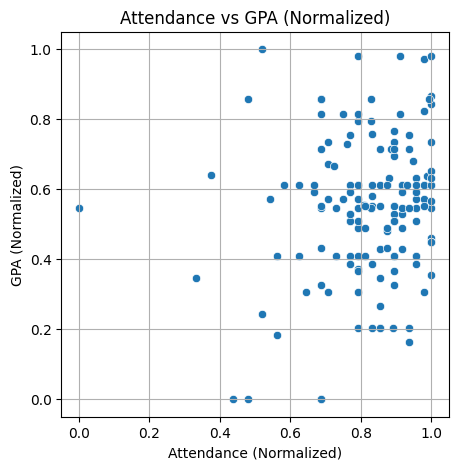

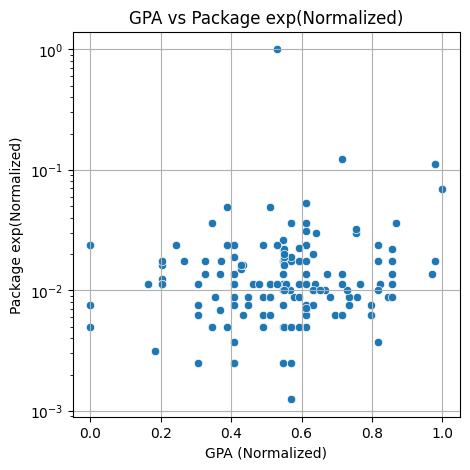

In [ ]:
# Scatter Plot 1: Attendance vs GPA
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Attendance_normalized', y='GPA_cleaned_normalized', data=df)
plt.title('Attendance vs GPA (Normalized)')
plt.xlabel('Attendance (Normalized)')
plt.ylabel('GPA (Normalized)')
plt.grid(True)
plt.show()

# Scatter Plot 2: GPA vs Package exp Salary
plt.figure(figsize=(5, 5))
sns.scatterplot(x='GPA_cleaned_normalized', y='Package exp_normalized', data=df)
plt.title('GPA vs Package exp(Normalized)')
plt.xlabel('GPA (Normalized)')
plt.yscale('log')
plt.ylabel('Package exp(Normalized)')
plt.grid(True)
plt.show()


In [ ]:
X=df[['Median salary_normalized',
    'GPA_cleaned_normalized']]

In [ ]:
from sklearn.metrics import pairwise_distances

manhattan_matrix = pairwise_distances(X, metric='manhattan')
manhattan_matrix_df = pd.DataFrame(manhattan_matrix)
manhattan_matrix_df.head()

euclidean_matrix = pairwise_distances(X, metric='euclidean')
euclidean_matrix_df = pd.DataFrame(euclidean_matrix)
euclidean_matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.000000,0.102041,0.020408,0.510204,2.857143e-01,0.102041,0.265306,0.714315,0.306122,0.342857,...,0.102041,0.102041,0.000015,0.102041,0.102046,0.265306,0.122449,0.102041,0.081633,0.142857
1,0.102041,0.000000,0.122449,0.408163,1.836735e-01,0.000152,0.367347,0.612280,0.204082,0.240816,...,0.204082,0.000046,0.102041,0.000107,0.001081,0.367347,0.020409,0.000274,0.020412,0.244898
2,0.020408,0.122449,0.000000,0.530612,3.061224e-01,0.122449,0.244898,0.734722,0.326531,0.363265,...,0.081633,0.122449,0.020408,0.122449,0.122453,0.244898,0.142857,0.122449,0.102041,0.122449
3,0.510204,0.408163,0.530612,0.000000,2.244898e-01,0.408163,0.775510,0.204185,0.204082,0.167347,...,0.612245,0.408163,0.510204,0.408163,0.408165,0.775510,0.387755,0.408163,0.428572,0.653061
4,0.285714,0.183673,0.306122,0.224490,7.450581e-09,0.183673,0.551020,0.428620,0.020408,0.057143,...,0.387755,0.183673,0.285714,0.183673,0.183676,0.551020,0.163265,0.183674,0.204082,0.428571
